In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset
db = pd.read_csv("diabetes.csv")

In [4]:
#prepare the data
X = db.drop(['Outcome'],axis =1)
#prepare the target
Y = db['Outcome']

In [5]:
#split the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)
# split the training data into training and validation set
X_train1,X_val,Y_train1,Y_val = train_test_split(X_train,Y_train,test_size = 0.125 ,random_state = 42)
print(len(X_train))
print(len(Y_train))
print(len(X_train1))
print(len(Y_train1))
print(len(X_val))
print(len(Y_val))
print(len(X_test))
print(len(Y_test))

614
614
537
537
77
77
154
154


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler1 = StandardScaler() 
scaler2 = StandardScaler()
scaler.fit(X_train1)
scaler1.fit(X_val)
scaler2.fit(X_test)
scaled_data = scaler.transform(X_train1)
scaled_data1 = scaler1.transform(X_val)
scaled_data2 = scaler2.transform(X_test)

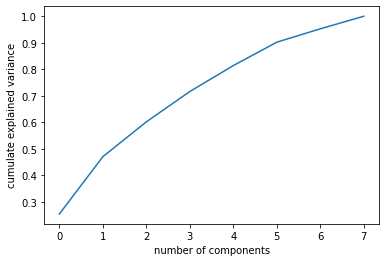

In [7]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulate explained variance')
plt.show()

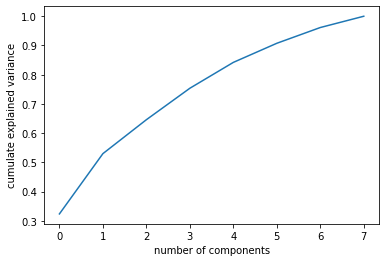

In [8]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulate explained variance')
plt.show()

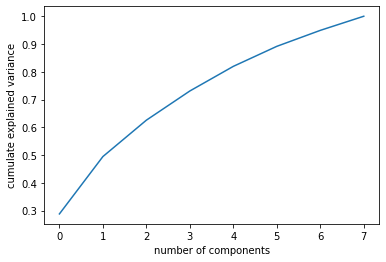

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulate explained variance')
plt.show()

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
pca.fit(scaled_data1)
pca.fit(scaled_data2)
x_pca = pca.transform(scaled_data)
x_pca1 = pca.transform(scaled_data1)
x_pca2 = pca.transform(scaled_data2)

Text(0, 0.5, 'Second Principal Component')

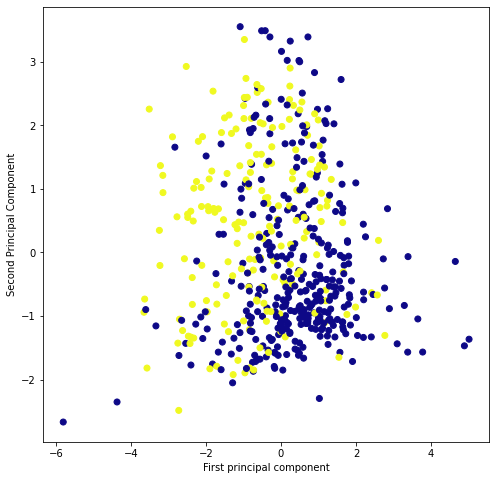

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=Y_train1,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

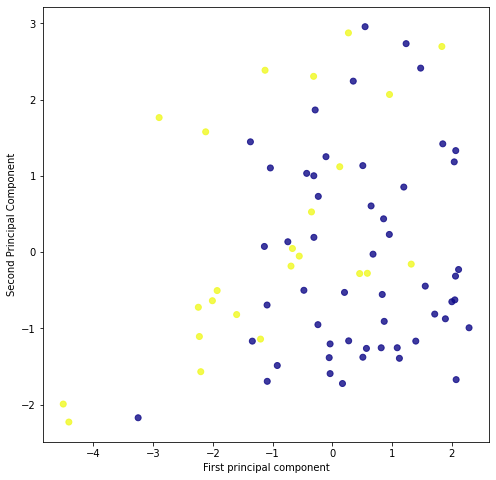

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca1[:,0],x_pca1[:,1],c=Y_val,cmap='plasma',alpha = 0.8)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

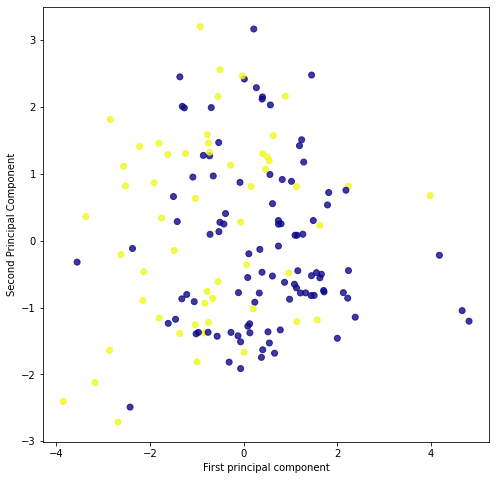

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca2[:,0],x_pca2[:,1],c=Y_test,cmap='plasma',alpha = 0.8)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [14]:
#import the important libraries
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalize Features
scaler = StandardScaler()
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler.fit(x_pca)
scaler1.fit(x_pca1)
scaler2.fit(x_pca2)
x_pca_0 = scaler.transform(x_pca)
x_pca_1 = scaler1.transform(x_pca1)
x_pca_2 = scaler2.transform(x_pca2)

In [15]:
# SVM Kernels( Accuracy on training dataset)
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(x_pca_0, Y_train1)
    y_pred = model.predict(x_pca_0)
    print(k)
    print(accuracy_score(Y_train1, y_pred)) 

linear
0.7188081936685289
poly
0.702048417132216
rbf
0.7355679702048417
sigmoid
0.6294227188081937


In [16]:
# SVM Kernels(Accuracy on validation set)
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(x_pca_1, Y_val)
    y_pred1 = model.predict(x_pca_1)
    print(k)
    print(accuracy_score(Y_val, y_pred1))

linear
0.7922077922077922
poly
0.7272727272727273
rbf
0.8181818181818182
sigmoid
0.7012987012987013


In [17]:
# SVM Kernels( Accuracy on test dataset)
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(x_pca_2, Y_test)
    y_pred2 = model.predict(x_pca_2)
    print(k)
    print(accuracy_score(Y_test, y_pred2)*100)

linear
72.72727272727273
poly
68.18181818181817
rbf
72.07792207792207
sigmoid
62.98701298701299


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
lda.fit(scaled_data,Y_train1)
lda.fit(scaled_data1,Y_val)
lda.fit(scaled_data2,Y_test)
X_lda = lda.transform(scaled_data)
X_lda1 = lda.transform(scaled_data1)
X_lda2 = lda.transform(scaled_data2)

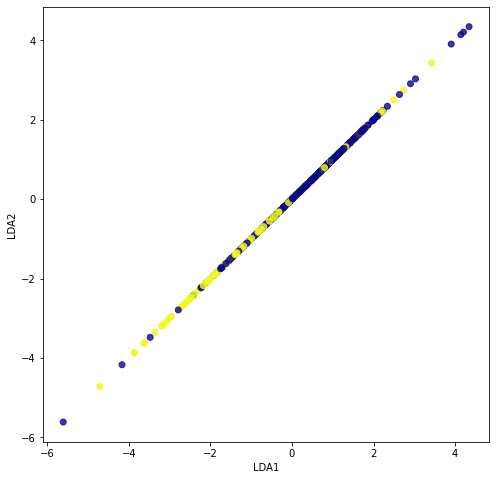

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(X_lda[:,0],X_lda[:,-1],c=Y_train1,cmap='plasma',alpha = 0.8)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.show()

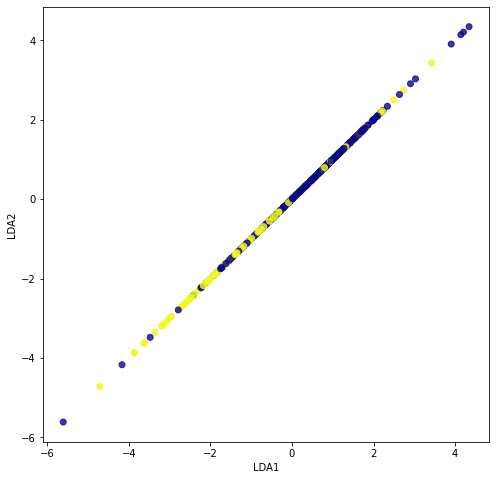

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(X_lda[:,0],X_lda[:,-1],c=Y_train1,cmap='plasma',alpha = 0.8)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.show()

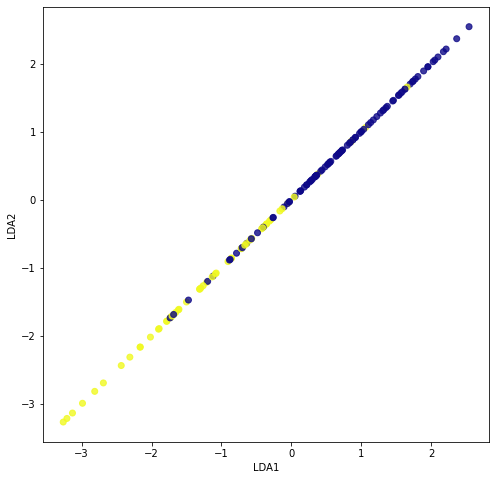

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(X_lda2[:,0],X_lda2[:,-1],c=Y_test,cmap='plasma',alpha = 0.8)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.show()

In [22]:
# Normalize Features
scaler = StandardScaler()
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler.fit(X_lda)
scaler1.fit(X_lda1)
scaler2.fit(X_lda2)
X_lda_0 = scaler.transform(X_lda)
X_lda_1 = scaler1.transform(X_lda1)
X_lda_2 = scaler2.transform(X_lda2)

In [23]:
# SVM Kernels( Accuracy on training dataset)
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_lda_0, Y_train1)
    y_pred = model.predict(X_lda_0)
    print(k)
    print(accuracy_score(Y_train1, y_pred))

linear
0.7281191806331471
poly
0.6852886405959032
rbf
0.74487895716946
sigmoid
0.6536312849162011


In [24]:
# SVM Kernels( Accuracy on validation dataset)
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_lda_1, Y_val)
    y_pred = model.predict(X_lda_1)
    print(k)
    print(accuracy_score(Y_val, y_pred))

linear
0.8181818181818182
poly
0.7922077922077922
rbf
0.8311688311688312
sigmoid
0.7142857142857143


In [25]:
# SVM Kernels( Accuracy on test dataset)
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_lda_2, Y_test)
    y_pred = model.predict(X_lda_2)
    print(k)
    print(accuracy_score(Y_test, y_pred))

linear
0.8051948051948052
poly
0.7922077922077922
rbf
0.7987012987012987
sigmoid
0.7597402597402597
